In [1]:
from SupertypeTools import CalcMat, CGCalcMat, heatmap, Matrix2Dendro
import numpy as np
import os
from pymol import cmd

import matplotlib.pyplot as plt

contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171]
weight = {3:[7,9,24,45,62,63,66,67,70,74,77,80,81,84,95,97,99,116,118,143,147,159]}

### === Figure 1: rmsd between crystal structure and mean crystal structure ===

In [3]:
def FA_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    FA_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):

            cmd.load(f"{InDir}/{InPDB}", "target")

            FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0] # full-atom RMSD

            FA_RMSD_list.append(FA_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return FA_RMSD_list

def BB_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    BB_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):

            cmd.load(f"{InDir}/{InPDB}", "target")

            BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0] # backbone RMSD

            BB_RMSD_list.append(BB_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return BB_RMSD_list

def hm_RMSD(InPDB, refPDB):
    cmd.load(refPDB, "template")
    cmd.load(InPDB, "target")

    BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0]
    FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0]

    cmd.delete("target")
    cmd.delete("template")

    return BB_RMSD, FA_RMSD

A_list = ["A01_01", "A02_01", "A02_06", "A03_01", "A11_01", "A23_01", "A24_02", "A30_03", "A68_01"]
B_list = ["B07_02", "B08_01", "B14_02", "B15_01", "B18_01", "B27_03", "B27_05", "B27_09", "B35_01",
     "B37_01", "B39_01", "B42_01", "B44_02", "B44_03", "B51_01", "B53_01", "B57_01", "B58_01"]

BB_full = []
FA_full = []

model_BB_full = []
model_FA_full = []

for allele in A_list:
    FA_RMSD_list = FA_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/A_mean/PDB/{allele}.pdb")
    BB_RMSD_list = BB_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/A_mean/PDB/{allele}.pdb")
    model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAA_relax/ALIGN/{allele}.pdb", f"../crystal/A_mean/PDB/{allele}.pdb")
    BB_full.extend(BB_RMSD_list)
    FA_full.extend(FA_RMSD_list)
    model_BB_full.append(model_BB_RMSD)
    model_FA_full.append(model_FA_RMSD)

for allele in B_list:
    FA_RMSD_list = FA_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/B_mean/PDB/{allele}.pdb")
    BB_RMSD_list = BB_RMSD(f"../crystal/{allele}/ALIGN", f"../crystal/B_mean/PDB/{allele}.pdb")
    model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAB_relax/ALIGN/{allele}.pdb", f"../crystal/B_mean/PDB/{allele}.pdb")
    BB_full.extend(BB_RMSD_list)
    FA_full.extend(FA_RMSD_list)
    model_BB_full.append(model_BB_RMSD)
    model_FA_full.append(model_FA_RMSD)

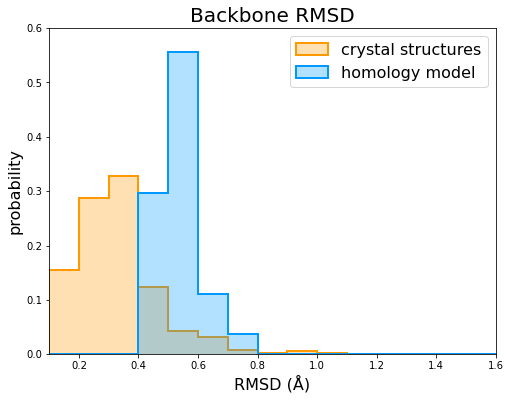

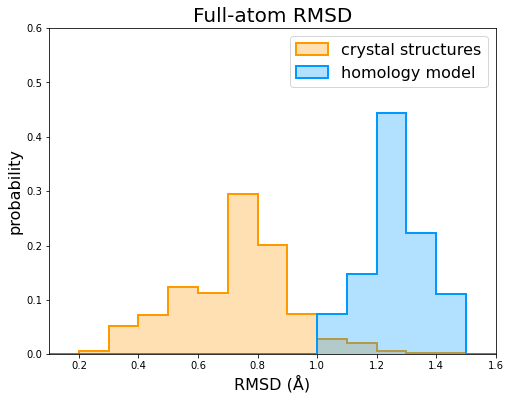

In [93]:
weights1 = np.ones_like(BB_full)/float(len(BB_full))
weights2 = np.ones_like(model_BB_full)/float(len(model_BB_full))

plt.figure(figsize=(8,6))
plt.xlim((0.1, 1.6))
plt.ylim((0, 0.6))
plt.hist(BB_full, weights=weights1, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(model_BB_full, weights=weights2, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
plt.title("Backbone RMSD", fontsize=20)
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(FA_full, weights=weights1, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(model_FA_full, weights=weights2, range=(0.1, 1.6), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_FA_full, density=True, facecolor='b', alpha=0.75)
plt.title("Full-atom RMSD", fontsize=20)
plt.xlim((0.1, 1.6))
plt.ylim((0, 0.6))
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.show()
# print(BB_RMSD_list_full, RMSD_list_full)

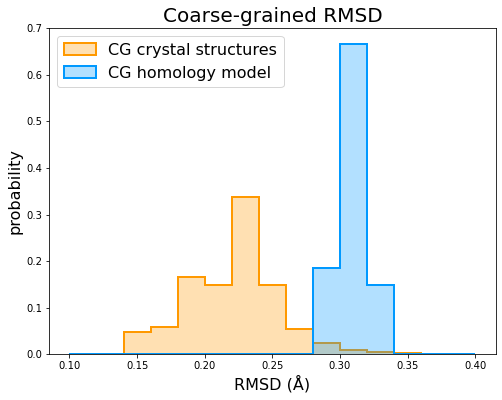

In [6]:
from CGmodel import CG_RMSD

A_list = ["A01_01", "A02_01", "A02_06", "A03_01", "A11_01", "A23_01", "A24_02", "A30_03", "A68_01"]
B_list = ["B07_02", "B08_01", "B14_02", "B15_01", "B18_01", "B27_03", "B27_05", "B27_09", "B35_01",
     "B37_01", "B39_01", "B42_01", "B44_02", "B44_03", "B51_01", "B53_01", "B57_01", "B58_01"]

CG_RMSD_list = []
CG_model_RMSD_list = []

for allele in A_list:
    # crystal structure
    for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG/{allele}"):
        if InDAT.endswith(".csv"):
            # print(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}")
            CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}", f"../crystal/A_mean/CG_DAT/{allele}_CG.csv"))

    # homology model
    CG_model_RMSD_list.append(CG_RMSD(f"../HLAA_relax/CG_DAT/{allele}_CG.csv", f"../crystal/A_mean/CG_DAT/{allele}_CG.csv"))

for allele in B_list:
    for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG/{allele}"):
        if InDAT.endswith(".csv"):
            # print(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}")
            CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG/{allele}/{InDAT}", f"../crystal/B_mean/CG_DAT/{allele}_CG.csv"))

    CG_model_RMSD_list.append(CG_RMSD(f"../HLAB_relax/CG_DAT/{allele}_CG.csv", f"../crystal/B_mean/CG_DAT/{allele}_CG.csv"))

weights1 = np.ones_like(CG_RMSD_list)/float(len(CG_RMSD_list))
weights2 = np.ones_like(CG_model_RMSD_list)/float(len(CG_model_RMSD_list))

plt.figure(figsize=(8,6))
# plt.xlim((0.1, 1.6))
# plt.ylim((0, 0.6))
plt.hist(CG_RMSD_list, weights=weights1, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="CG crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(CG_model_RMSD_list, weights=weights2, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="CG homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
plt.title("Coarse-grained RMSD", fontsize=20)
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16, loc="upper left")
plt.show()

### === Figure 2: clustering of reference panel (homology model and mean crystal structure), comping to existing supertypes ===

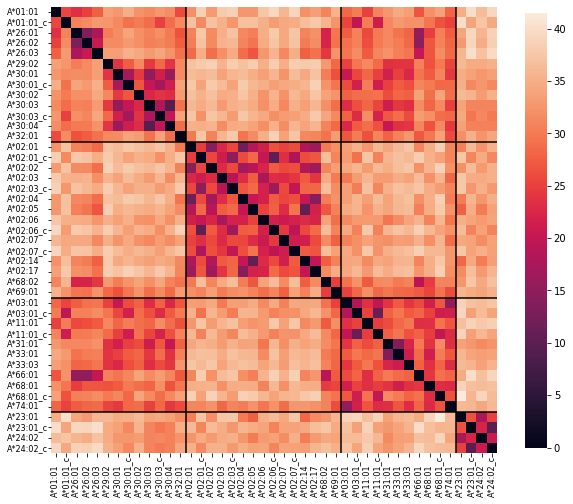

In [2]:
A_order = [
    ['A01_01_hm', 'A01_01_cr', 'A26_01_hm', 'A26_02_hm', 'A26_03_hm', 'A29_02_hm', 'A30_01_hm', 'A30_01_cr', 'A30_02_hm', 'A30_03_hm', 'A30_03_cr', 'A30_04_hm', 'A32_01_hm'],
    ['A02_01_hm', 'A02_01_cr', 'A02_02_hm', 'A02_03_hm', 'A02_03_cr', 'A02_04_hm', 'A02_05_hm', 'A02_06_hm', 'A02_06_cr', 'A02_07_hm', 'A02_07_cr', 'A02_14_hm', 'A02_17_hm', 'A68_02_hm', 'A69_01_hm'],
    ['A03_01_hm', 'A03_01_cr', 'A11_01_hm', 'A11_01_cr', 'A31_01_hm', 'A33_01_hm', 'A33_03_hm', 'A66_01_hm', 'A68_01_hm', 'A68_01_cr', 'A74_01_hm'],
    ['A23_01_hm', 'A23_01_cr', 'A24_02_hm', 'A24_02_cr']
]

A_label = [
    'A*01:01','A*01:01_c','A*26:01','A*26:02','A*26:03','A*29:02','A*30:01','A*30:01_c','A*30:02','A*30:03','A*30:03_c','A*30:04','A*32:01',
    'A*02:01','A*02:01_c','A*02:02','A*02:03','A*02:03_c','A*02:04','A*02:05','A*02:06','A*02:06_c','A*02:07','A*02:07_c','A*02:14','A*02:17','A*68:02','A*69:01',
    'A*03:01','A*03:01_c','A*11:01','A*11:01_c','A*31:01','A*33:01','A*33:03','A*66:01','A*68:01','A*68:01_c','A*74:01',
    'A*23:01','A*23:01_c','A*24:02','A*24:02_c'
]

Mat = CalcMat("../Figures/Figure2_compare_to_existing_supertype/HLA-A/DAT", "../Figures/Figure2_compare_to_existing_supertype/HLA-A/HLA-A.csv", contact=contact, weight=weight)
heatmap(Mat, A_order, label=A_label)
Matrix2Dendro(Mat, "HLA-A_fa.newick")

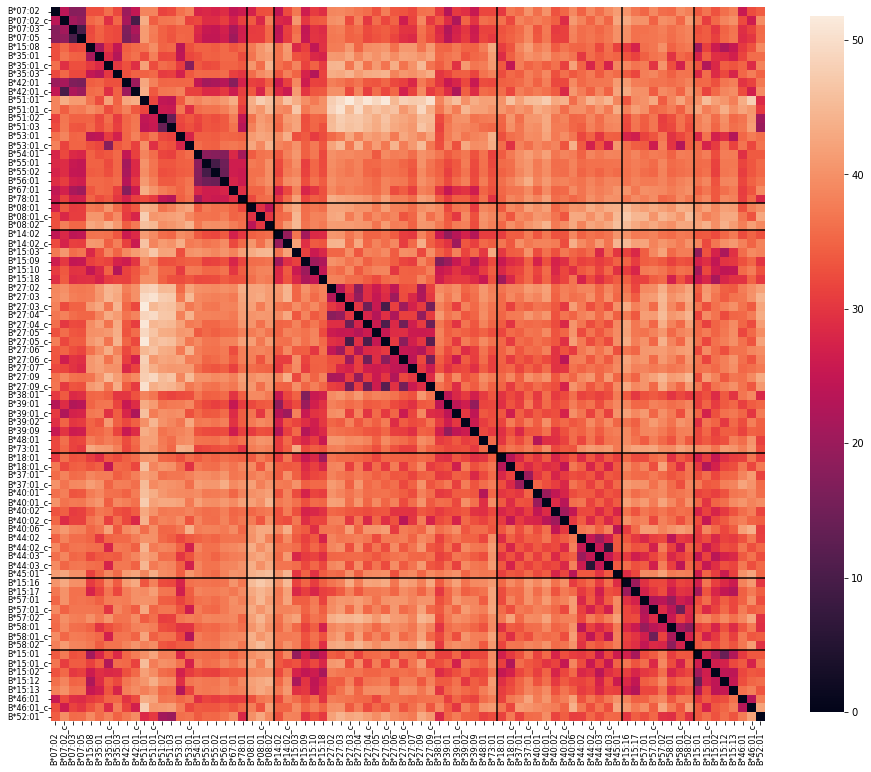

In [6]:
B_order = [
    ['B07_02_hm','B07_02_cr','B07_03_hm','B07_05_hm','B15_08_hm','B35_01_hm','B35_01_cr','B35_03_hm','B42_01_hm','B42_01_cr','B51_01_hm','B51_01_cr','B51_02_hm','B51_03_hm','B53_01_hm','B53_01_cr','B54_01_hm','B55_01_hm','B55_02_hm','B56_01_hm','B67_01_hm','B78_01_hm'],
    ['B08_01_hm','B08_01_cr','B08_02_hm'],
    ['B14_02_hm','B14_02_cr','B15_03_hm','B15_09_hm','B15_10_hm','B15_18_hm','B27_02_hm','B27_03_hm','B27_03_cr','B27_04_hm','B27_04_cr','B27_05_hm','B27_05_cr','B27_06_hm','B27_06_cr','B27_07_hm','B27_09_hm','B27_09_cr','B38_01_hm','B39_01_hm','B39_01_cr','B39_02_hm','B39_09_hm','B48_01_hm','B73_01_hm'],
    ['B18_01_hm','B18_01_cr','B37_01_hm','B37_01_cr','B40_01_hm','B40_01_cr','B40_02_hm','B40_02_cr','B40_06_hm','B44_02_hm','B44_02_cr','B44_03_hm','B44_03_cr','B45_01_hm'],
    ['B15_16_hm','B15_17_hm','B57_01_hm','B57_01_cr','B57_02_hm','B58_01_hm','B58_01_cr','B58_02_hm'],
    ['B15_01_hm','B15_01_cr','B15_02_hm','B15_12_hm','B15_13_hm','B46_01_hm','B46_01_cr','B52_01_hm']
    ]

B_label=[
    'B*07:02','B*07:02_c','B*07:03','B*07:05','B*15:08','B*35:01','B*35:01_c','B*35:03','B*42:01','B*42:01_c','B*51:01','B*51:01_c','B*51:02','B*51:03','B*53:01','B*53:01_c','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01',
    'B*08:01','B*08:01_c','B*08:02',
    'B*14:02','B*14:02_c','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:03_c','B*27:04','B*27:04_c','B*27:05','B*27:05_c','B*27:06','B*27:06_c','B*27:07','B*27:09','B*27:09_c','B*38:01','B*39:01','B*39:01_c','B*39:02','B*39:09','B*48:01','B*73:01',
    'B*18:01','B*18:01_c','B*37:01','B*37:01_c','B*40:01','B*40:01_c','B*40:02','B*40:02_c','B*40:06','B*44:02','B*44:02_c','B*44:03','B*44:03_c','B*45:01',
    'B*15:16','B*15:17','B*57:01','B*57:01_c','B*57:02','B*58:01','B*58:01_c','B*58:02',
    'B*15:01','B*15:01_c','B*15:02','B*15:12','B*15:13','B*46:01','B*46:01_c','B*52:01'
]
Mat = CalcMat("../Figures/Figure2_compare_to_existing_supertype/HLA-B/DAT", "../Figures/Figure2_compare_to_existing_supertype/HLA-B/HLA-B.csv", contact=contact, weight=weight)
heatmap(Mat, B_order, size=(16,16), label=B_label)
Matrix2Dendro(Mat, "HLA-B_fa.newick")

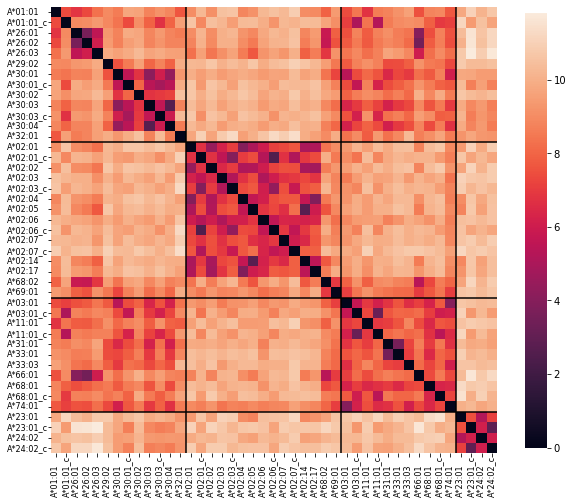

In [7]:
A_CG_order = [
    ['A01_01_hm_CG', 'A01_01_cr_CG', 'A26_01_hm_CG', 'A26_02_hm_CG', 'A26_03_hm_CG', 'A29_02_hm_CG', 'A30_01_hm_CG', 'A30_01_cr_CG', 'A30_02_hm_CG', 'A30_03_hm_CG', 'A30_03_cr_CG', 'A30_04_hm_CG', 'A32_01_hm_CG'],
    ['A02_01_hm_CG', 'A02_01_cr_CG', 'A02_02_hm_CG', 'A02_03_hm_CG', 'A02_03_cr_CG', 'A02_04_hm_CG', 'A02_05_hm_CG', 'A02_06_hm_CG', 'A02_06_cr_CG', 'A02_07_hm_CG', 'A02_07_cr_CG', 'A02_14_hm_CG', 'A02_17_hm_CG', 'A68_02_hm_CG', 'A69_01_hm_CG'],
    ['A03_01_hm_CG', 'A03_01_cr_CG', 'A11_01_hm_CG', 'A11_01_cr_CG', 'A31_01_hm_CG', 'A33_01_hm_CG', 'A33_03_hm_CG', 'A66_01_hm_CG', 'A68_01_hm_CG', 'A68_01_cr_CG', 'A74_01_hm_CG'],
    ['A23_01_hm_CG', 'A23_01_cr_CG', 'A24_02_hm_CG', 'A24_02_cr_CG']
    ]

Mat = CGCalcMat("../Figures/Figure2_compare_to_existing_supertype/HLA-A/CG_DAT", "../Figures/Figure2_compare_to_existing_supertype/HLA-A/HLA-A_CG.csv", contact=contact, weight=weight)
heatmap(Mat, A_CG_order, label=A_label)
Matrix2Dendro(Mat, "HLA-A_cg.newick")

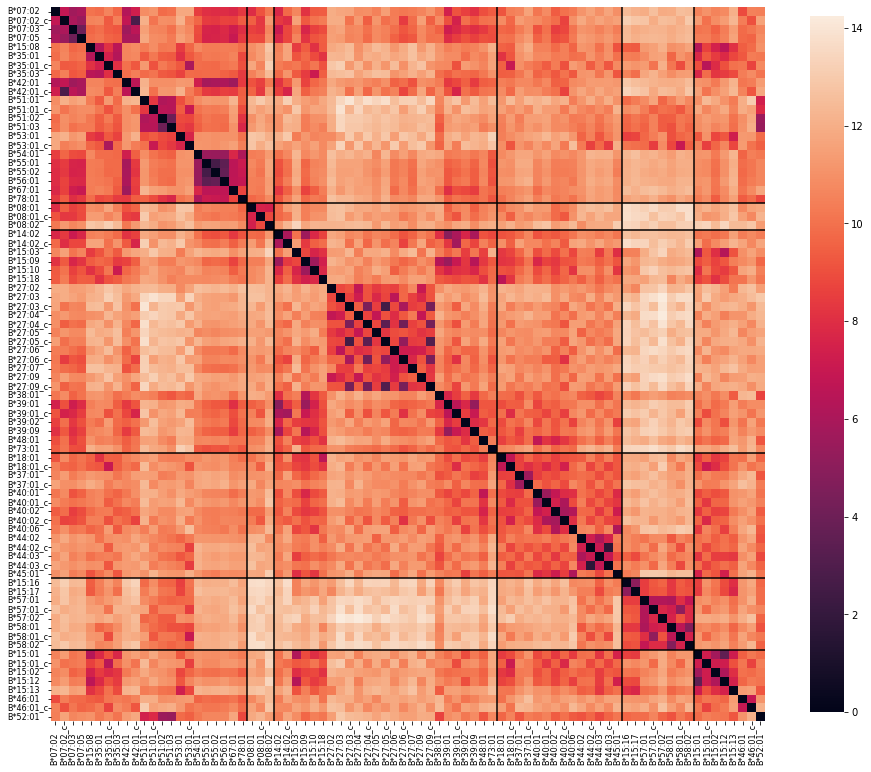

In [8]:
B_CG_order = [
    ['B07_02_hm_CG','B07_02_cr_CG','B07_03_hm_CG','B07_05_hm_CG','B15_08_hm_CG','B35_01_hm_CG','B35_01_cr_CG','B35_03_hm_CG','B42_01_hm_CG','B42_01_cr_CG','B51_01_hm_CG','B51_01_cr_CG','B51_02_hm_CG','B51_03_hm_CG','B53_01_hm_CG','B53_01_cr_CG','B54_01_hm_CG','B55_01_hm_CG','B55_02_hm_CG','B56_01_hm_CG','B67_01_hm_CG','B78_01_hm_CG'],
    ['B08_01_hm_CG','B08_01_cr_CG','B08_02_hm_CG'],
    ['B14_02_hm_CG','B14_02_cr_CG','B15_03_hm_CG','B15_09_hm_CG','B15_10_hm_CG','B15_18_hm_CG','B27_02_hm_CG','B27_03_hm_CG','B27_03_cr_CG','B27_04_hm_CG','B27_04_cr_CG','B27_05_hm_CG','B27_05_cr_CG','B27_06_hm_CG','B27_06_cr_CG','B27_07_hm_CG','B27_09_hm_CG','B27_09_cr_CG','B38_01_hm_CG','B39_01_hm_CG','B39_01_cr_CG','B39_02_hm_CG','B39_09_hm_CG','B48_01_hm_CG','B73_01_hm_CG'],
    ['B18_01_hm_CG','B18_01_cr_CG','B37_01_hm_CG','B37_01_cr_CG','B40_01_hm_CG','B40_01_cr_CG','B40_02_hm_CG','B40_02_cr_CG','B40_06_hm_CG','B44_02_hm_CG','B44_02_cr_CG','B44_03_hm_CG','B44_03_cr_CG','B45_01_hm_CG'],
    ['B15_16_hm_CG','B15_17_hm_CG','B57_01_hm_CG','B57_01_cr_CG','B57_02_hm_CG','B58_01_hm_CG','B58_01_cr_CG','B58_02_hm_CG'],
    ['B15_01_hm_CG','B15_01_cr_CG','B15_02_hm_CG','B15_12_hm_CG','B15_13_hm_CG','B46_01_hm_CG','B46_01_cr_CG','B52_01_hm_CG']
    ]

Mat = CGCalcMat("../Figures/Figure2_compare_to_existing_supertype/HLA-B/CG_DAT", "../Figures/Figure2_compare_to_existing_supertype/HLA-B/HLA-B_CG.csv", contact=contact, weight=weight)
heatmap(Mat, B_CG_order, size=(16,16), label=B_label)
Matrix2Dendro(Mat, "HLA-B_cg.newick")

### === Figure 3: all HLA class I ===